In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import files
files.upload()

Saving train_u6lujuX_CVtuZ9i (1).csv to train_u6lujuX_CVtuZ9i (1) (1).csv


{'train_u6lujuX_CVtuZ9i (1).csv': b'Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status\r\nLP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y\r\nLP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N\r\nLP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y\r\nLP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y\r\nLP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y\r\nLP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,Y\r\nLP001013,Male,Yes,0,Not Graduate,No,2333,1516,95,360,1,Urban,Y\r\nLP001014,Male,Yes,3+,Graduate,No,3036,2504,158,360,0,Semiurban,N\r\nLP001018,Male,Yes,2,Graduate,No,4006,1526,168,360,1,Urban,Y\r\nLP001020,Male,Yes,1,Graduate,No,12841,10968,349,360,1,Semiurban,N\r\nLP001024,Male,Yes,2,Graduate,No,3200,700,70,360,1,Urban,Y\r\nLP001027,Male,Yes,2,Graduate,,2500,1840,109,360,1,Urban,Y\r\nLP001028,Male,Yes,2,Graduate,No,3073,8106,2

In [ ]:
loan_data = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
type(loan_data)

pandas.core.frame.DataFrame

In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_data.shape

(614, 13)

In [ ]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
loan_data = loan_data.dropna()

In [ ]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# label encoding
loan_data.replace({"Loan_Status": {'N': 0, 'Y': 1}}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [ ]:
loan_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [ ]:
# replacing the value of 3+ to 4
loan_data = loan_data.replace(to_replace = '3+', value = 4)

In [ ]:
# Dependent values
loan_data['Dependents'].value_counts()


0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

**Data Visualization**

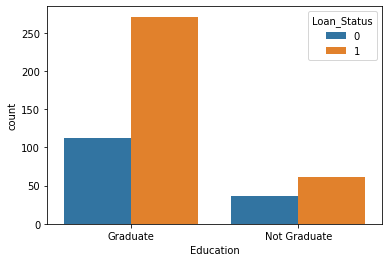

In [ ]:
# education and loan status
sns.countplot(x = 'Education', hue = 'Loan_Status', data = loan_data)

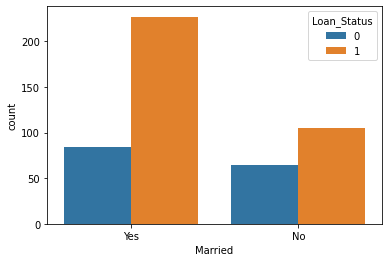

In [ ]:
# martial and loan status
sns.countplot(x = 'Married', hue = 'Loan_Status', data = loan_data)

In [ ]:
# convert categorical columns to numerical values
loan_data.replace({"Married": {'No': 0, 'Yes': 1}, "Gender": {'Male': 0, 'Female': 1}, "Self_Employed": {'No': 0, 'Yes': 1}, 
                  "Property_Area": {'Rural': 0, 'Semiurban': 1, 'Urban': 2}, "Education": {'Graduate': 0, 'Not Graduate': 1}}, inplace = True)

In [ ]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,0,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [ ]:
# seperating the data and labels
X = loan_data.drop(columns = ['Loan_ID', 'Loan_Status'],  axis = 1) 
Y = loan_data['Loan_Status'] 

In [ ]:
print(X)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         0        1          1          0              0             4583   
2         0        1          0          0              1             3000   
3         0        1          0          1              0             2583   
4         0        0          0          0              0             6000   
5         0        1          2          0              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       1        0          0          0              0             2900   
610       0        1          4          0              0             4106   
611       0        1          1          0              0             8072   
612       0        1          2          0              0             7583   
613       1        0          0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
print(Y)

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 480, dtype: int64


In [ ]:
# Train and Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, stratify = Y, random_state = 2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(480, 11) (432, 11) (48, 11)


In [ ]:
print(X_train)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
122       1        0          0          0              0             2137   
498       0        1          1          0              1             2895   
144       0        1          2          0              0            11757   
217       0        1          0          0              0             3727   
362       0        1          0          0              0             4750   
..      ...      ...        ...        ...            ...              ...   
72        0        0          0          0              0             3500   
390       0        0          4          0              0             9167   
76        0        0          0          0              0             3750   
286       1        0          0          0              1             2600   
376       0        1          4          0              0             8750   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [ ]:
print(Y_train)

122    1
498    1
144    1
217    1
362    1
      ..
72     1
390    1
76     0
286    0
376    1
Name: Loan_Status, Length: 432, dtype: int64


**MODEL TRAINING**

In [ ]:
classifier = svm.SVC(kernel = 'linear')

In [ ]:
# training the support vector machine
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

**MODEL EVALUATION**

In [ ]:
# accuracy on training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on training data:', training_data_accuracy)

Accuracy on training data: 0.7777777777777778


In [ ]:
# accuracy on testing data
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)


In [ ]:
print('Accuracy on testing data:', testing_data_accuracy)

Accuracy on testing data: 0.8333333333333334
